In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,joblib
print("Imported")


Imported


In [2]:
Data_file_path = "https://raw.githubusercontent.com/upflairs-pvt-ltd/1st_june_data_science/master/customer_satisfaction/cust_satisfaction.csv"
df = pd.read_csv(Data_file_path)
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [4]:
#total duplicates
df.duplicated().sum()

np.int64(172)

In [5]:
#no. of missing values
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [6]:
df.dropna(inplace=True)


In [7]:
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

Central tendencies:
1. meam
2. median
3. mode

In [8]:
female = df[df['Gender'] == 'Female']
female['Customer Type'].value_counts()

Customer Type
Loyal Customer       42336
disloyal Customer    10240
Name: count, dtype: int64

In [9]:
male = df[df['Gender'] == 'Male']
male['Customer Type'].value_counts()

Customer Type
Loyal Customer       42326
disloyal Customer     8692
Name: count, dtype: int64

In [10]:
df['Type of Travel'].value_counts()

Type of Travel
Business travel    71465
Personal Travel    32129
Name: count, dtype: int64

In [11]:
df['Class'].value_counts()

Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

In [12]:
## classification imbalance or balance dataset  , Only 2 classes (binary classification)
## y_variable
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64

In [13]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [14]:
df['Class'].value_counts()

Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

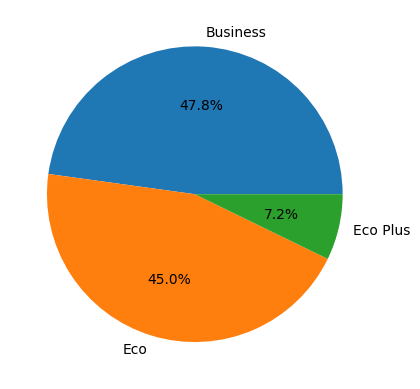

In [15]:
# lables = ['Business','Eco','Eco Plus']
# size =[49533,46593,7468]

# plt.show()
# plt.pie(size,labels=lables,autopct='%1.1f%%')

# Or

label = list(df['Class'].value_counts().keys())
count = list(df['Class'].value_counts().values)
plt.pie(count,labels=label,autopct='%1.1f%%')
plt.show()


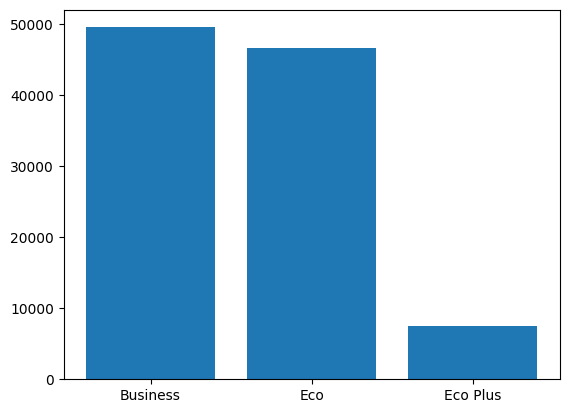

In [16]:
plt.bar(label,count)
plt.show()


In [17]:
label = list(df['Class'].value_counts().keys())
count = list(df['Class'].value_counts().values)

<Axes: >

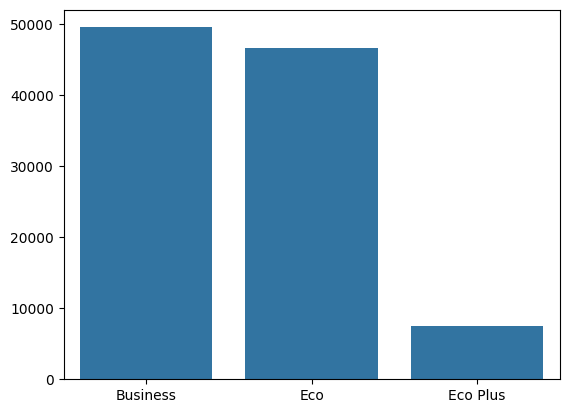

In [18]:
sns.barplot(x=label,y=count)

<Axes: xlabel='count', ylabel='Class'>

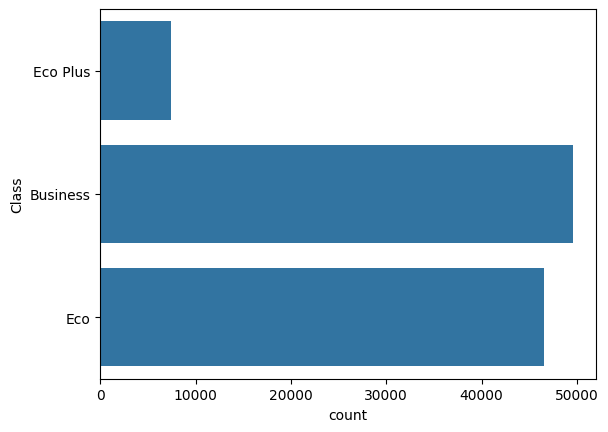

In [19]:
sns.countplot(df['Class'])

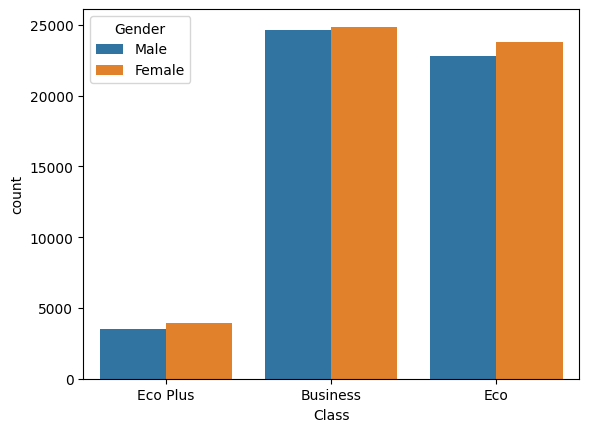

In [20]:
sns.countplot(x='Class',data=df,hue="Gender")
plt.show()

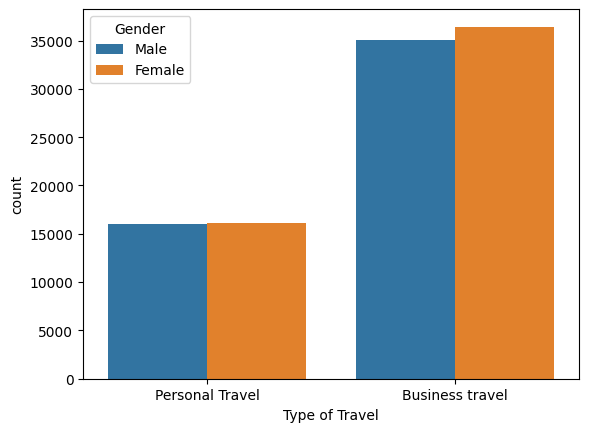

In [21]:
sns.countplot(x='Type of Travel',data=df,hue="Gender")
plt.show()

In [22]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


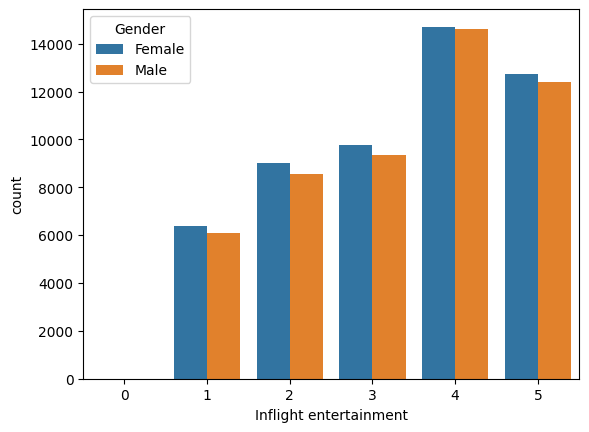

In [23]:
sns.countplot(x='Inflight entertainment',data=df,hue="Gender")
plt.show()

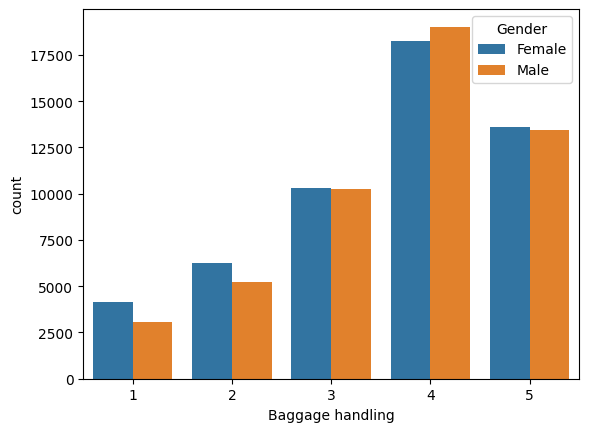

In [24]:
sns.countplot(x='Baggage handling',data=df,hue="Gender")
plt.show()

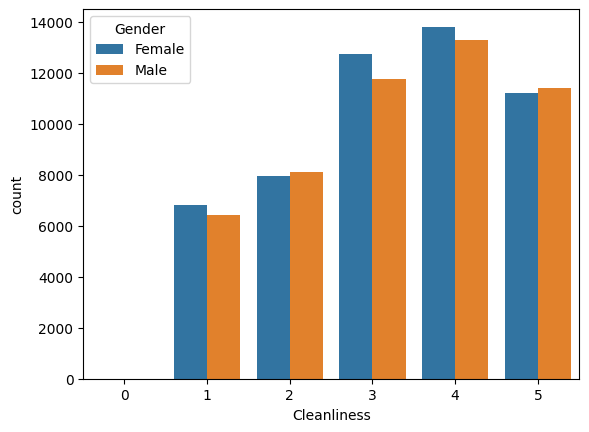

In [25]:
sns.countplot(x='Cleanliness',data=df,hue="Gender")
plt.show()

# represent any alphabetical col. in numerical

Onehot encoding------> if we convert yes,no into 1/0
when there is no comparison(yellow,red)
if there is only 2 class[male,female]

label encoding ------> if we convert yes,no,other into 0/1/2
when there is comparison(high,medium,low)

In [26]:
# from sklearn.preprocessing import OneHotEncoder , LabelEncoder

# onehot encoding representation
pd.get_dummies(df).astype(int)

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13,460,5,4,5,25,18,0,1,1,0,0,1,0,0,1,1,0
1,25,235,1,3,1,1,6,0,1,0,1,1,0,1,0,0,1,0
2,26,1142,5,4,5,0,0,1,0,1,0,1,0,1,0,0,0,1
3,25,562,2,3,2,11,9,1,0,1,0,1,0,1,0,0,1,0
4,61,214,3,4,3,0,0,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0,1,0,0,1,1,0,0,1,0,1,0
103900,49,2347,5,5,4,0,0,0,1,1,0,1,0,1,0,0,0,1
103901,30,1995,4,4,4,7,14,0,1,0,1,1,0,1,0,0,1,0
103902,22,1000,1,1,1,0,0,1,0,0,1,1,0,0,1,0,1,0


In [27]:
# used to remove either of the col from(0/1) ,from onehot encoding
df2 = pd.get_dummies(df,drop_first="if_binary").astype(int)

In [28]:
df2

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,5,4,5,25,18,1,0,1,0,1,0
1,25,235,1,3,1,1,6,1,1,0,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0,1
3,25,562,2,3,2,11,9,0,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0,0,1,0,1,0,0
103900,49,2347,5,5,4,0,0,1,0,0,0,0,1
103901,30,1995,4,4,4,7,14,1,1,0,0,0,0
103902,22,1000,1,1,1,0,0,0,1,0,1,0,0


In [29]:
df.drop(['Departure Delay in Minutes','Cleanliness'],axis=1)

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,0.0
...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,0.0


In [30]:
df2

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,5,4,5,25,18,1,0,1,0,1,0
1,25,235,1,3,1,1,6,1,1,0,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0,1
3,25,562,2,3,2,11,9,0,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0,0,1,0,1,0,0
103900,49,2347,5,5,4,0,0,1,0,0,0,0,1
103901,30,1995,4,4,4,7,14,1,1,0,0,0,0
103902,22,1000,1,1,1,0,0,0,1,0,1,0,0


In [31]:
## x and y split

x = df2.drop('satisfaction_satisfied',axis='columns')
y = df2[['satisfaction_satisfied']]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)  

In [34]:
x_train.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
90728,16,602,4,5,4,11,11,1,0,1,0,1
33423,50,3205,3,3,3,29,23,1,0,0,0,0
27703,33,1544,5,5,5,0,0,1,0,0,0,0
98938,56,888,1,3,1,14,29,1,0,0,1,0
78738,51,862,4,4,5,0,0,1,0,0,0,0


In [35]:
len(x_train)

82875

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
## model or algo. training

from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()



In [38]:
lgr.fit(x_train,y_train)

LogisticRegression()

In [39]:
print("Training score : ",lgr.score(x_train,y_train)*100)
print("Testing score : ",lgr.score(x_test,y_test)*100)


Training score :  78.63046757164405
Testing score :  77.957430377914


In [40]:
##Prediction

pred = lgr.predict(x_test)

In [41]:
y_test['prediction'] = pred

In [42]:
y_test.head(40)

,satisfaction_satisfied,prediction
92159,0,0
74952,0,0
23377,0,1
48810,1,1
37349,0,0
72434,1,1
17094,0,1
78398,1,1
68654,0,1
7749,1,1


In [43]:
from sklearn.metrics import confusion_matrix,classification_report

##confusion matrix


true +ve     false +ve
false -ve     true -ve


actual->predicted
1->1          0->1
1->0          0->0

TN/Tp---> must high
fP/FN---> mut low

accuracy = (tp+tn)/(tp+tn+fp+fn)

In [44]:
#confusion_matrix(ACTUAL_VALUE , PREDICTED_VALUE)--->return 2d matrix
confusion_matrix(y_test['satisfaction_satisfied'],y_test['prediction'])

array([[9166, 2498],
       [2069, 6986]])

In [45]:
(9668+6876)/(9668+2125+2050+6876)
#Testing score :  79.84941358173657

0.7984941358173657

In [46]:
print(classification_report(y_test['satisfaction_satisfied'],y_test['prediction']))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80     11664
           1       0.74      0.77      0.75      9055

    accuracy                           0.78     20719
   macro avg       0.78      0.78      0.78     20719
weighted avg       0.78      0.78      0.78     20719



f1-score---> if data is imbalance
precision/recall/accuracy----> if data is balance & values must be high

In [50]:
import joblib
os.makedirs('models',exist_ok=True)
joblib.dump(lgr,'./models/logistic_regression.lb')

['./models/logistic_regression.lb']

In [51]:
lgr

LogisticRegression()